In [1]:
from rdkit import rdBase
rdBase.rdkitVersion

'2019.03.1'

In [2]:
import glob
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

import pandas as pd
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_to_library = '../FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

In [4]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, embedProps=False)
        
    fragments = []
    fingerprints = []
    smiles = []

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        # 2D coordinates
        tmp = AllChem.Compute2DCoords(fixed_frag)
        fragments.append(fixed_frag)
        # smiles for drawing fragment
        smiles.append(Chem.MolToSmiles(fixed_frag))
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
     
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [09:44:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:47] Unexpected error hit on line 56
RDKit ERROR: [09:44:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:47] Unexpected error hit on line 119
RDKit ERROR: [09:44:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERRO

RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 17821
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 17880
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 31768
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 31826
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RD

RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 48184
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 48239
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 63998
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 64103
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/cond

RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 80343
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:48] Unexpected error hit on line 80398
RDKit ERROR: [09:44:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:49] Unexpected error hit on line 94918
RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:49] Unexpected error hit on line 94996
RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:49] 
RD

RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:49] Unexpected error hit on line 110477
RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:49] Unexpected error hit on line 110541
RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:49] 
RDKi

RDKit ERROR: [09:44:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:51] Unexpected error hit on line 47
RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:51] Unexpected error hit on line 102
RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR

RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:51] Unexpected error hit on line 16462
RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:51] Unexpected error hit on line 65
RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda

RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:51] Unexpected error hit on line 14500
RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:51] Unexpected error hit on line 14559
RDKit ERROR: [09:44:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:51] 
RD

RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 30837
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 30910
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RD

RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 47150
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 47235
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 63695
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 63775
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occur

RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 79278
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 79340
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 95642
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:52] Unexpected error hit on line 95706
RDKit ERROR: [09:44:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 111254
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 111324
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 


RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 127715
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 127780
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 145030
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 145096
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 


RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 159601
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 159665
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 


RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 178343
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:53] Unexpected error hit on line 178418
RDKit ERROR: [09:44:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:53] 


RDKit ERROR: [09:44:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:56] Unexpected error hit on line 56
RDKit ERROR: [09:44:56] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:56] Unexpected error hit on line 169
RDKit ERROR: [09:44:56] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:56] 
RDKit ERR

RDKit ERROR: [09:44:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:56] Unexpected error hit on line 16789
RDKit ERROR: [09:44:56] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:56] Unexpected error hit on line 16852
RDKit ERROR: [09:44:56] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 33137
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 33192
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 49130
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 49212
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 67898
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 67960
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1

RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 85281
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 85336
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKi

RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 105219
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:57] Unexpected error hit on line 105304
RDKit ERROR: [09:44:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [09:44:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 54
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 121
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR

RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 673
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 771
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected

RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 15347
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 15402
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 31044
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:44:59] Unexpected error hit on line 31099
RDKit ERROR: [09:44:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:44:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:45:00] Unexpected error hit on line 47380
RDKit ERROR: [09:45:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:45:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:45:00] Unexpected error hit on line 47447
RDKit ERROR: [09:45:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:45:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:45:00] Unexpect

RDKit ERROR: [09:45:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:45:00] Unexpected error hit on line 63703
RDKit ERROR: [09:45:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:45:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:45:00] Unexpected error hit on line 63764
RDKit ERROR: [09:45:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [09:45:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

(7475, 14)

In [5]:
df_AP = data[data.subpocket=='AP']
df_FP = data[data.subpocket=='FP']
df_SE = data[data.subpocket=='SE']
df_GA = data[data.subpocket=='GA']
df_B1 = data[data.subpocket=='B1']
df_B2 = data[data.subpocket=='B2']

Functions needed for Clustering:

In [6]:
# Calculate distance matrix for fingerprint list
def Tanimoto_distance_matrix(fp_list):
    fp_list = list(fp_list)
    dissimilarity_matrix = []
    for i in range(1,len(fp_list)):
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i],fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1-x for x in similarities])
    return dissimilarity_matrix

In [7]:
# Input: Fingerprints and a threshold for the clustering
def ClusterFps(fps, cutoff=0.2):
    # Calculate Tanimoto distance matrix
    distance_matr = Tanimoto_distance_matrix(fps)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matr,len(fps),cutoff,isDistData=True)
    return clusters

In [8]:
def analyze_clusters(clusters, subpocket, cutoff):
    
    # Give a short report about the numbers of clusters and their sizes
    num_clust_g1 = len([c for c in clusters if len(c) == 1])
    num_clust_g5 = len([c for c in clusters if len(c) > 5])
    num_clust_g25 = len([c for c in clusters if len(c) > 25])
    num_clust_g100 = len([c for c in clusters if len(c) > 100])

    print(subpocket)
    print("Threshold: ", cutoff)
    print("total # clusters: ", len(clusters))
    print("# clusters with only 1 compound: ", num_clust_g1)
    print("# clusters with >5 compounds: ", num_clust_g5)
    print("# clusters with >25 compounds: ", num_clust_g25)
    print("# clusters with >100 compounds: ", num_clust_g100)

    # Plot the size of the clusters
    fig = plt.figure(1, figsize=(8, 3))
    plt1 = plt.subplot(111)
    plt.axis([0, len(clusters), 0, len(clusters[0])+1])
    plt.xlabel('Cluster index', fontsize=20)
    plt.ylabel('Number of molecules', fontsize=20)
    plt.tick_params(labelsize=16)
    plt.title('Threshold: '+str('%3.1f' %cutoff), fontsize=10)
    plt1.bar(range(1, len(clusters)), [len(c) for c in clusters[:len(clusters)-1]], lw=0)
    plt.show()

    return


## Butina Clustering for each subpocket with different cutoffs:

AP
Threshold:  0.0
total # clusters:  1200
# clusters with only 1 compound:  819
# clusters with >5 compounds:  78
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


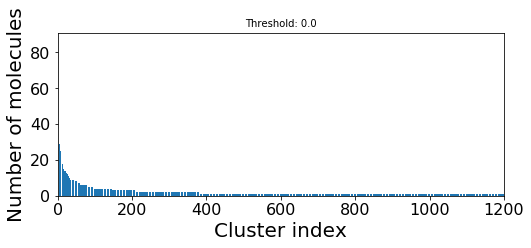

AP
Threshold:  0.1
total # clusters:  1123
# clusters with only 1 compound:  737
# clusters with >5 compounds:  89
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


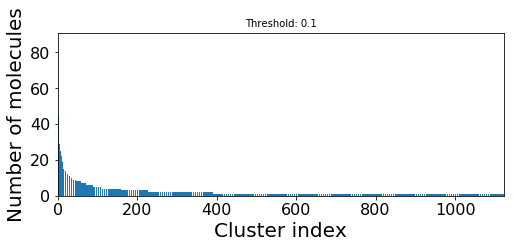

AP
Threshold:  0.2
total # clusters:  920
# clusters with only 1 compound:  562
# clusters with >5 compounds:  99
# clusters with >25 compounds:  8
# clusters with >100 compounds:  0


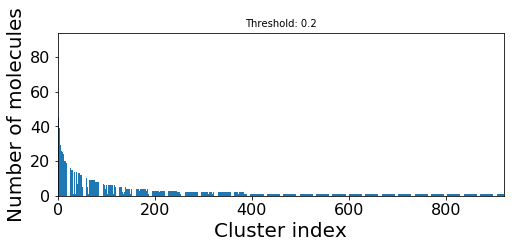

AP
Threshold:  0.30000000000000004
total # clusters:  729
# clusters with only 1 compound:  412
# clusters with >5 compounds:  96
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


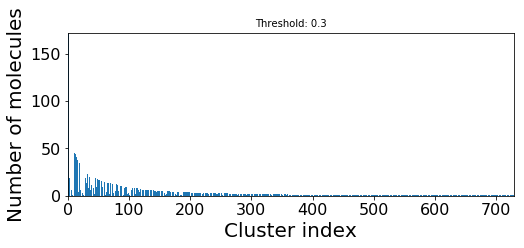

AP
Threshold:  0.4
total # clusters:  562
# clusters with only 1 compound:  297
# clusters with >5 compounds:  96
# clusters with >25 compounds:  18
# clusters with >100 compounds:  1


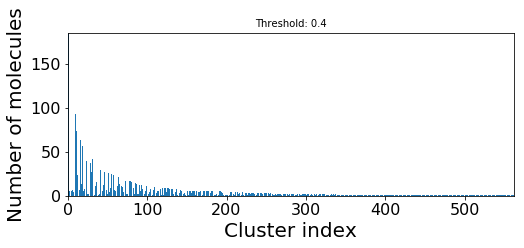

AP
Threshold:  0.5
total # clusters:  392
# clusters with only 1 compound:  182
# clusters with >5 compounds:  85
# clusters with >25 compounds:  18
# clusters with >100 compounds:  4


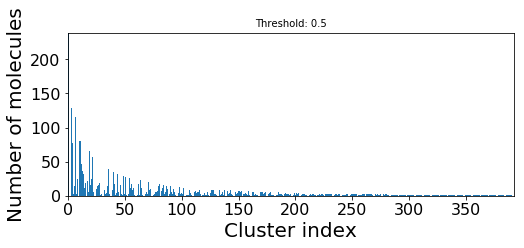

AP
Threshold:  0.6000000000000001
total # clusters:  230
# clusters with only 1 compound:  93
# clusters with >5 compounds:  66
# clusters with >25 compounds:  20
# clusters with >100 compounds:  5


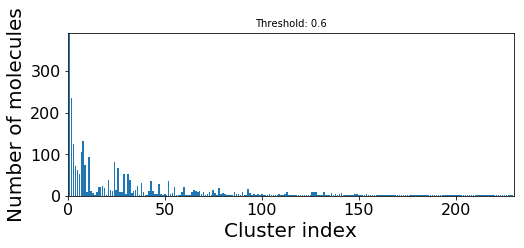

AP
Threshold:  0.7000000000000001
total # clusters:  122
# clusters with only 1 compound:  45
# clusters with >5 compounds:  45
# clusters with >25 compounds:  19
# clusters with >100 compounds:  3


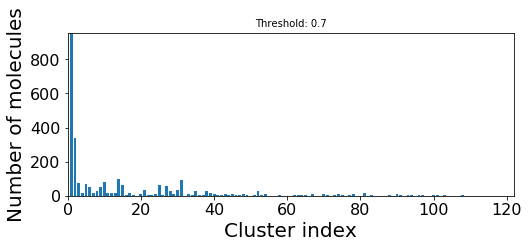

AP
Threshold:  0.8
total # clusters:  44
# clusters with only 1 compound:  12
# clusters with >5 compounds:  16
# clusters with >25 compounds:  8
# clusters with >100 compounds:  4


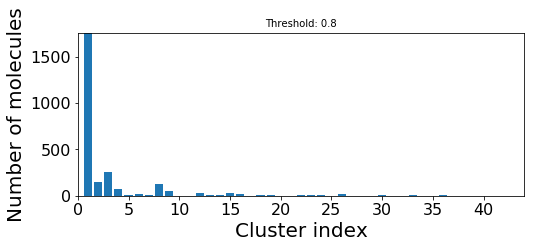

AP
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  2
# clusters with >5 compounds:  6
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


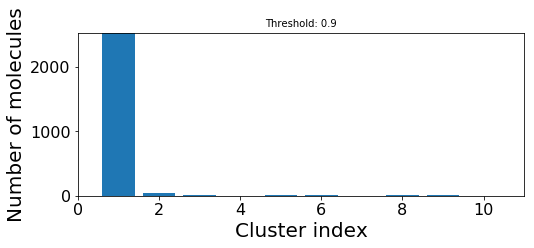

In [9]:
# cluster adenine pocket
fps = df_AP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'AP', cutoff=i)

FP
Threshold:  0.0
total # clusters:  776
# clusters with only 1 compound:  523
# clusters with >5 compounds:  57
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


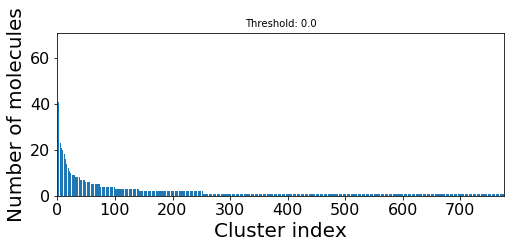

FP
Threshold:  0.1
total # clusters:  749
# clusters with only 1 compound:  491
# clusters with >5 compounds:  58
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


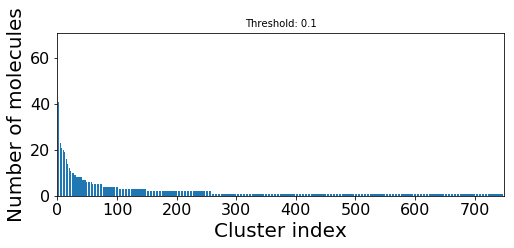

FP
Threshold:  0.2
total # clusters:  682
# clusters with only 1 compound:  419
# clusters with >5 compounds:  65
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


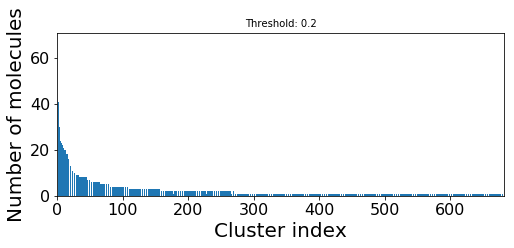

FP
Threshold:  0.30000000000000004
total # clusters:  564
# clusters with only 1 compound:  313
# clusters with >5 compounds:  61
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


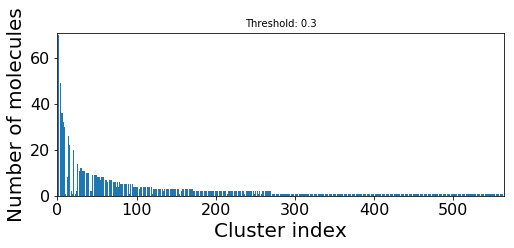

FP
Threshold:  0.4
total # clusters:  440
# clusters with only 1 compound:  216
# clusters with >5 compounds:  67
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


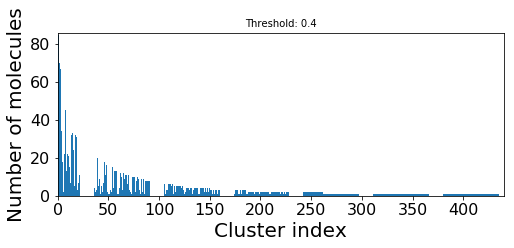

FP
Threshold:  0.5
total # clusters:  305
# clusters with only 1 compound:  136
# clusters with >5 compounds:  62
# clusters with >25 compounds:  13
# clusters with >100 compounds:  2


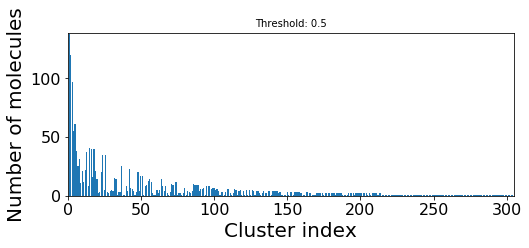

FP
Threshold:  0.6000000000000001
total # clusters:  220
# clusters with only 1 compound:  79
# clusters with >5 compounds:  57
# clusters with >25 compounds:  16
# clusters with >100 compounds:  3


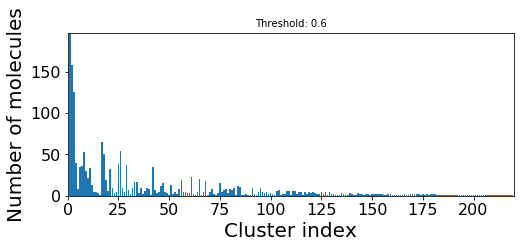

FP
Threshold:  0.7000000000000001
total # clusters:  108
# clusters with only 1 compound:  27
# clusters with >5 compounds:  48
# clusters with >25 compounds:  13
# clusters with >100 compounds:  4


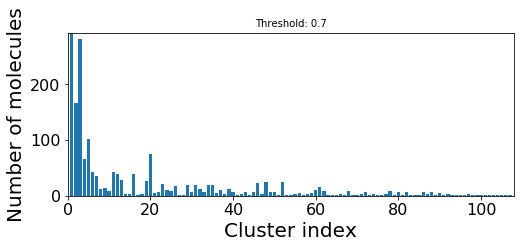

FP
Threshold:  0.8
total # clusters:  50
# clusters with only 1 compound:  9
# clusters with >5 compounds:  25
# clusters with >25 compounds:  8
# clusters with >100 compounds:  5


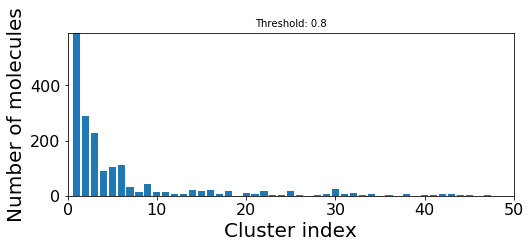

FP
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  8
# clusters with >25 compounds:  4
# clusters with >100 compounds:  2


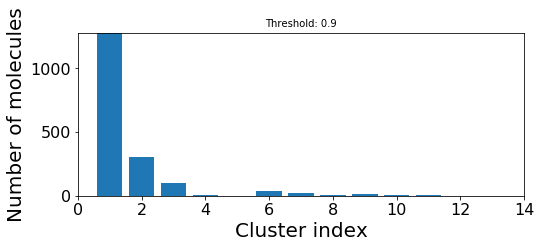

In [10]:
# cluster front pocket
fps = df_FP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'FP', cutoff=i)

SE
Threshold:  0.0
total # clusters:  608
# clusters with only 1 compound:  406
# clusters with >5 compounds:  46
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


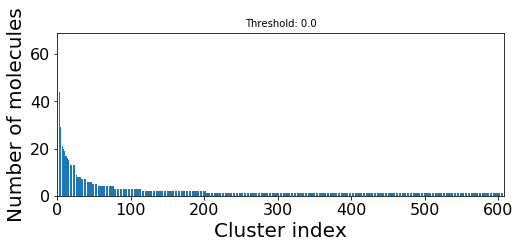

SE
Threshold:  0.1
total # clusters:  576
# clusters with only 1 compound:  376
# clusters with >5 compounds:  46
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


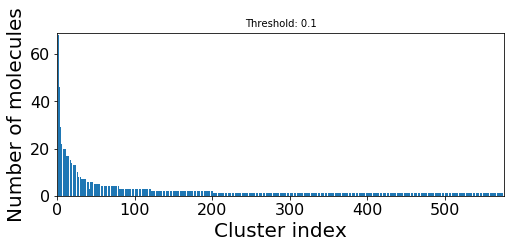

SE
Threshold:  0.2
total # clusters:  492
# clusters with only 1 compound:  302
# clusters with >5 compounds:  51
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


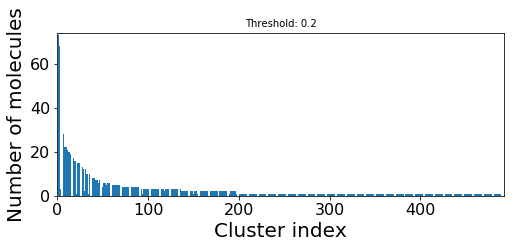

SE
Threshold:  0.30000000000000004
total # clusters:  410
# clusters with only 1 compound:  236
# clusters with >5 compounds:  49
# clusters with >25 compounds:  7
# clusters with >100 compounds:  0


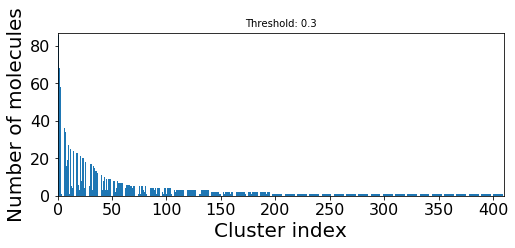

SE
Threshold:  0.4
total # clusters:  307
# clusters with only 1 compound:  157
# clusters with >5 compounds:  50
# clusters with >25 compounds:  13
# clusters with >100 compounds:  1


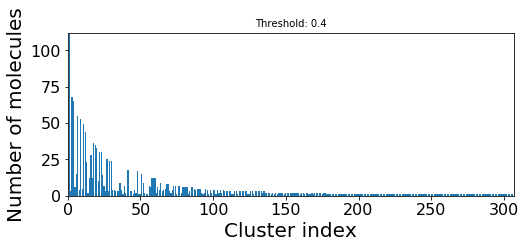

SE
Threshold:  0.5
total # clusters:  213
# clusters with only 1 compound:  90
# clusters with >5 compounds:  43
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


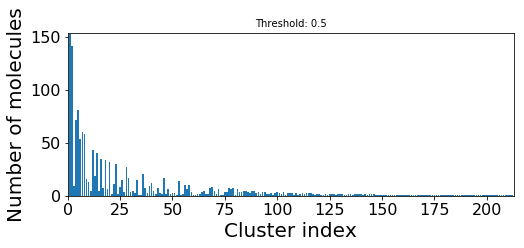

SE
Threshold:  0.6000000000000001
total # clusters:  149
# clusters with only 1 compound:  59
# clusters with >5 compounds:  40
# clusters with >25 compounds:  13
# clusters with >100 compounds:  3


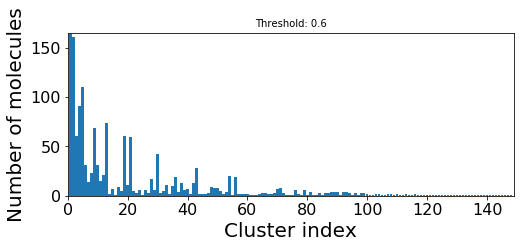

SE
Threshold:  0.7000000000000001
total # clusters:  87
# clusters with only 1 compound:  30
# clusters with >5 compounds:  27
# clusters with >25 compounds:  14
# clusters with >100 compounds:  4


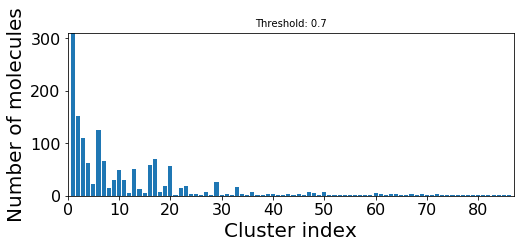

SE
Threshold:  0.8
total # clusters:  39
# clusters with only 1 compound:  7
# clusters with >5 compounds:  18
# clusters with >25 compounds:  10
# clusters with >100 compounds:  4


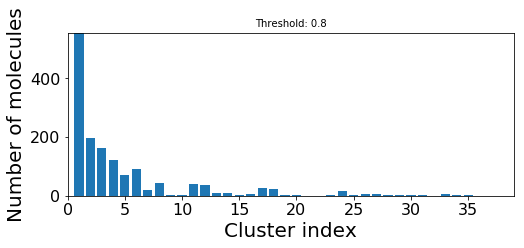

SE
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  6
# clusters with >25 compounds:  6
# clusters with >100 compounds:  1


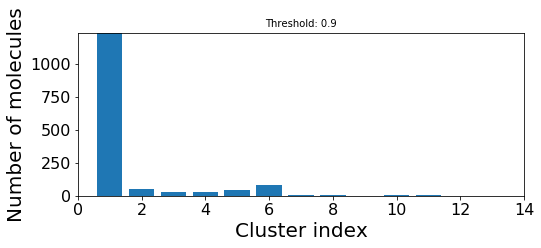

In [11]:
# cluster solvent exposed pocket
fps = df_SE.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'SE', cutoff=i)

GA
Threshold:  0.0
total # clusters:  424
# clusters with only 1 compound:  264
# clusters with >5 compounds:  43
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


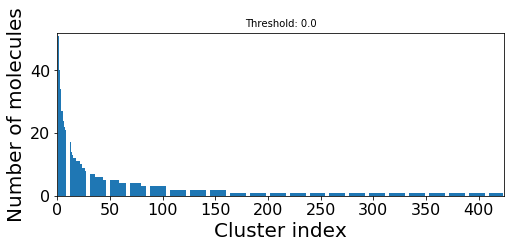

GA
Threshold:  0.1
total # clusters:  414
# clusters with only 1 compound:  250
# clusters with >5 compounds:  44
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


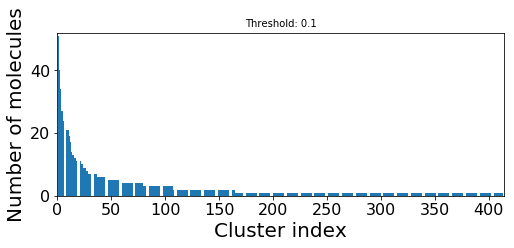

GA
Threshold:  0.2
total # clusters:  359
# clusters with only 1 compound:  205
# clusters with >5 compounds:  49
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


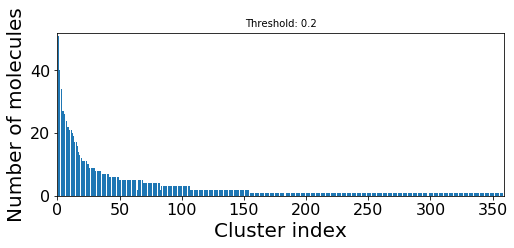

GA
Threshold:  0.30000000000000004
total # clusters:  299
# clusters with only 1 compound:  161
# clusters with >5 compounds:  48
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


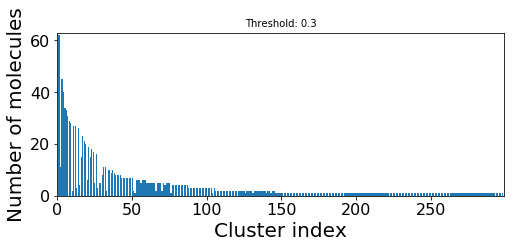

GA
Threshold:  0.4
total # clusters:  243
# clusters with only 1 compound:  120
# clusters with >5 compounds:  50
# clusters with >25 compounds:  9
# clusters with >100 compounds:  1


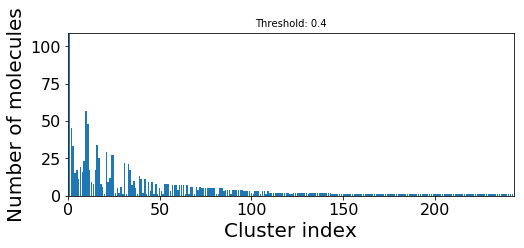

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  85
# clusters with >5 compounds:  36
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


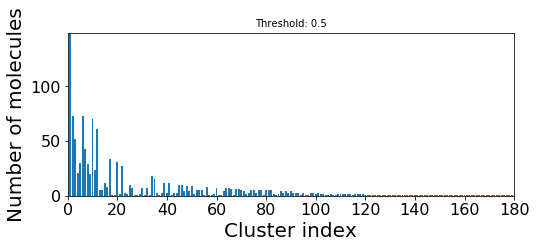

GA
Threshold:  0.6000000000000001
total # clusters:  118
# clusters with only 1 compound:  50
# clusters with >5 compounds:  36
# clusters with >25 compounds:  10
# clusters with >100 compounds:  2


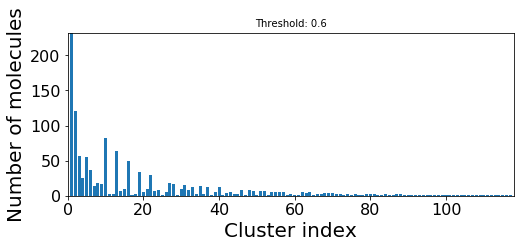

GA
Threshold:  0.7000000000000001
total # clusters:  77
# clusters with only 1 compound:  24
# clusters with >5 compounds:  28
# clusters with >25 compounds:  9
# clusters with >100 compounds:  3


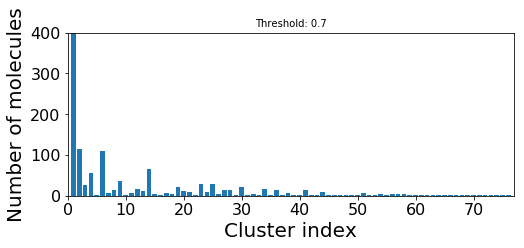

GA
Threshold:  0.8
total # clusters:  35
# clusters with only 1 compound:  5
# clusters with >5 compounds:  21
# clusters with >25 compounds:  8
# clusters with >100 compounds:  3


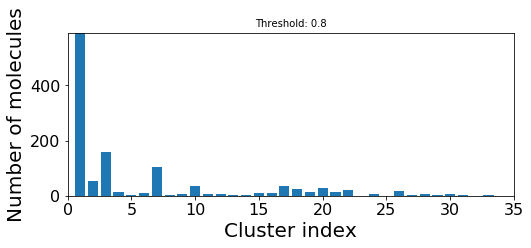

GA
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  1
# clusters with >5 compounds:  8
# clusters with >25 compounds:  4
# clusters with >100 compounds:  1


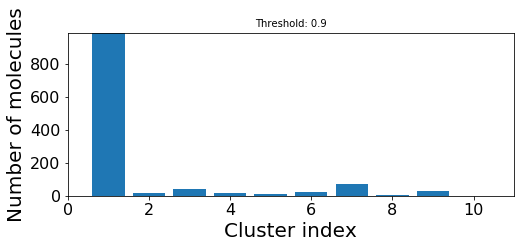

In [12]:
# cluster gate area
fps = df_GA.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'GA', cutoff=i)

B1
Threshold:  0.0
total # clusters:  56
# clusters with only 1 compound:  40
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


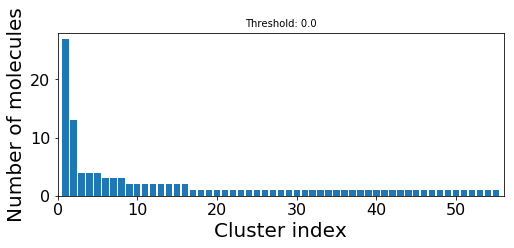

B1
Threshold:  0.1
total # clusters:  56
# clusters with only 1 compound:  40
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


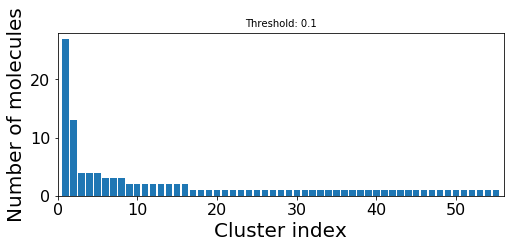

B1
Threshold:  0.2
total # clusters:  54
# clusters with only 1 compound:  37
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


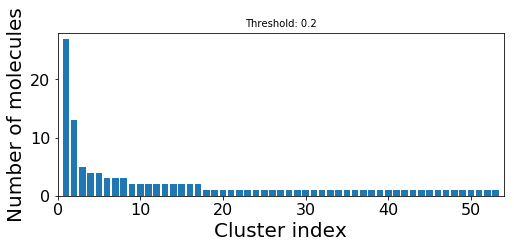

B1
Threshold:  0.30000000000000004
total # clusters:  49
# clusters with only 1 compound:  28
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


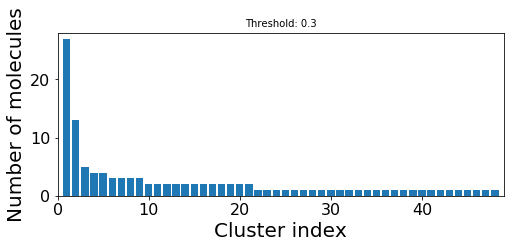

B1
Threshold:  0.4
total # clusters:  40
# clusters with only 1 compound:  23
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


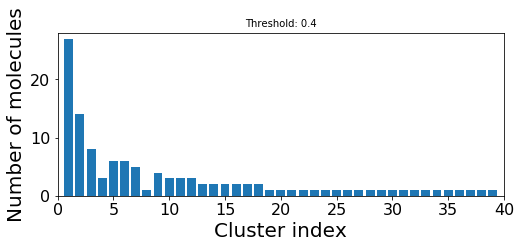

B1
Threshold:  0.5
total # clusters:  33
# clusters with only 1 compound:  17
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


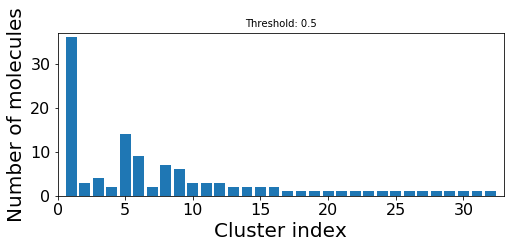

B1
Threshold:  0.6000000000000001
total # clusters:  31
# clusters with only 1 compound:  15
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


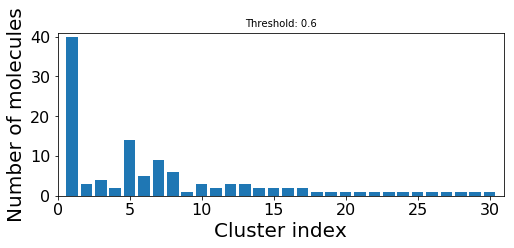

B1
Threshold:  0.7000000000000001
total # clusters:  23
# clusters with only 1 compound:  11
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


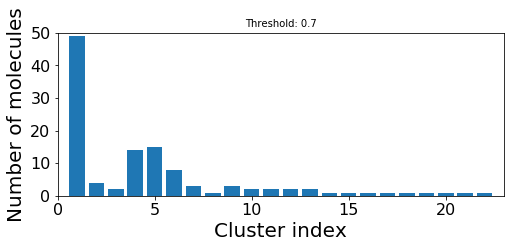

B1
Threshold:  0.8
total # clusters:  18
# clusters with only 1 compound:  6
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


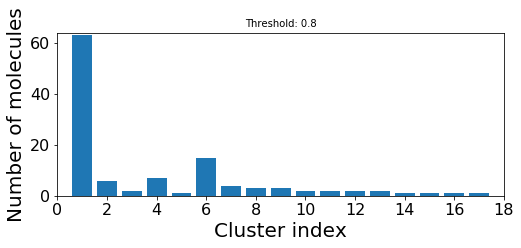

B1
Threshold:  0.9
total # clusters:  8
# clusters with only 1 compound:  3
# clusters with >5 compounds:  3
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


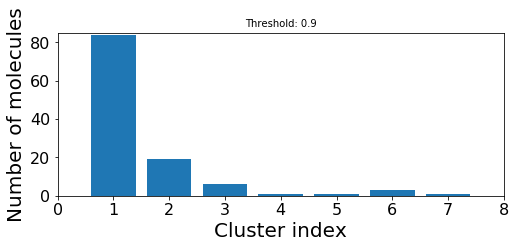

In [13]:
# cluster back pocket I
fps = df_B1.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B1', cutoff=i)

B2
Threshold:  0.0
total # clusters:  124
# clusters with only 1 compound:  85
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


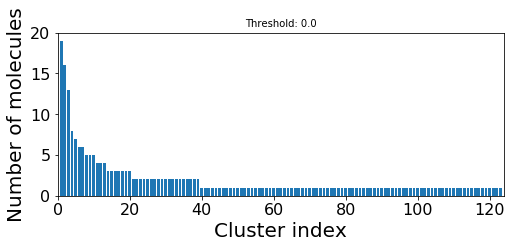

B2
Threshold:  0.1
total # clusters:  121
# clusters with only 1 compound:  81
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


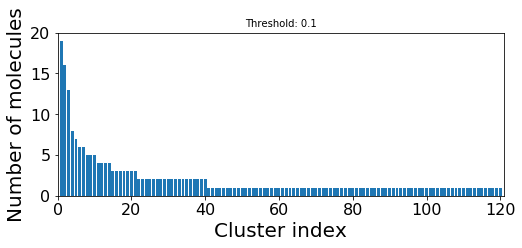

B2
Threshold:  0.2
total # clusters:  114
# clusters with only 1 compound:  71
# clusters with >5 compounds:  8
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


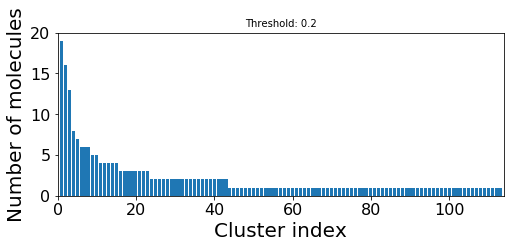

B2
Threshold:  0.30000000000000004
total # clusters:  103
# clusters with only 1 compound:  60
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


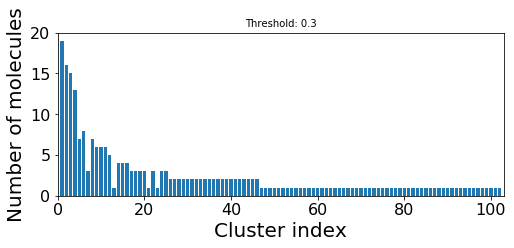

B2
Threshold:  0.4
total # clusters:  88
# clusters with only 1 compound:  43
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


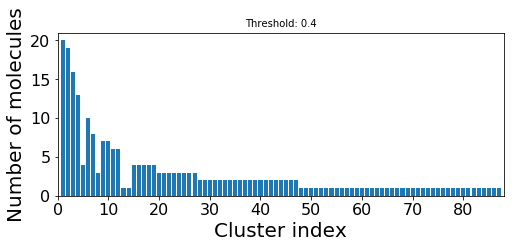

B2
Threshold:  0.5
total # clusters:  72
# clusters with only 1 compound:  30
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


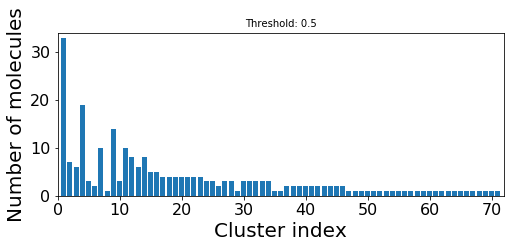

B2
Threshold:  0.6000000000000001
total # clusters:  58
# clusters with only 1 compound:  21
# clusters with >5 compounds:  12
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


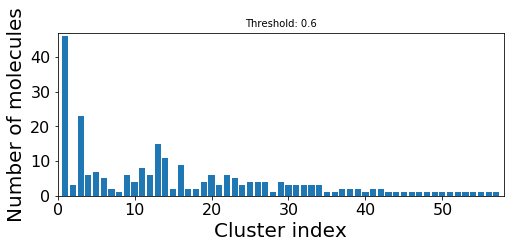

B2
Threshold:  0.7000000000000001
total # clusters:  33
# clusters with only 1 compound:  6
# clusters with >5 compounds:  10
# clusters with >25 compounds:  2
# clusters with >100 compounds:  0


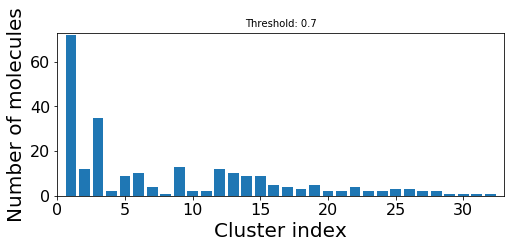

B2
Threshold:  0.8
total # clusters:  23
# clusters with only 1 compound:  7
# clusters with >5 compounds:  8
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


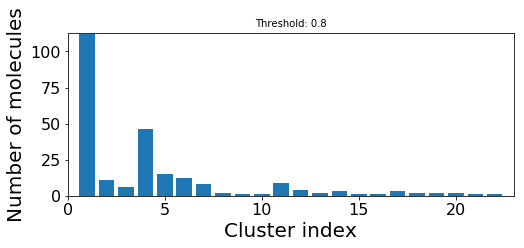

B2
Threshold:  0.9
total # clusters:  9
# clusters with only 1 compound:  2
# clusters with >5 compounds:  6
# clusters with >25 compounds:  1
# clusters with >100 compounds:  1


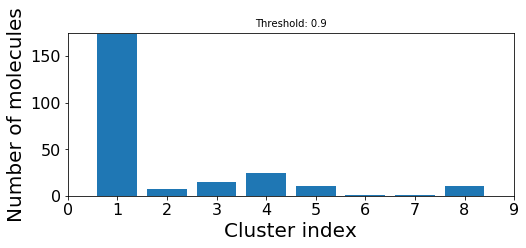

In [14]:
# cluster back pocket II
fps = df_B2.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B2', cutoff=i)

## Investigate clusters:

In [15]:
def principal_components(X):
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)
    return [p[0] for p in X], [p[1] for p in X]

In [16]:
def find_cluster_mcs(cluster, frags, threshold=0.8):
    frags = list(frags)
    mols = [frags[i] for i in cluster]
    mcs = rdFMCS.FindMCS(mols, threshold=threshold)
    substructure = Chem.MolFromSmarts(mcs.smartsString)
    return substructure

In [17]:
def cluster_scatter_plots(x, y, clusters, n_clusters, df, subpocket):
    
    X, Y = [], []
    kinases = list(df.group)
    kinasesXY = []
    cluster_colors = []#np.empty(len(points), dtype=object)
    for p, point in enumerate(x):
        for c, cluster in enumerate(clusters[:n_clusters]):
            if p in cluster:
                cluster_colors.append(c)
                X.append(point)
                Y.append(y[p])
                kinasesXY.append(kinases[p])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(X, Y, c=cluster_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by cluster')

    # find kinase colors
    kinase_set = list(set(kinasesXY))
    kinase_colors = []
    for k, kinase in enumerate(kinasesXY):
        kinase_colors.append(kinase_set.index(kinase))

    plt.subplot(1,2,2)
    plt.scatter(X, Y, c=kinase_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by kinase group')
    plt.show()
    
    return None

## ADENINE POCKET:

AP
Threshold:  0.5
total # clusters:  392
# clusters with only 1 compound:  182
# clusters with >5 compounds:  85
# clusters with >25 compounds:  18
# clusters with >100 compounds:  4


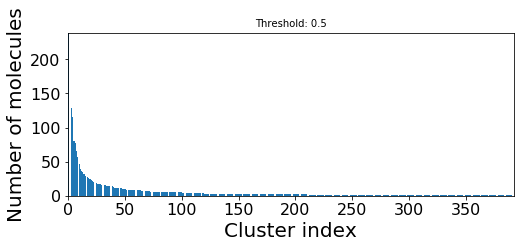

Total number of fragments:  2640


In [41]:
# investigate adenine pocket clusters
cutoff = 0.5
fps = df_AP.fingerprint
frags = df_AP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)
 
analyze_clusters(clusters, 'AP', cutoff)

print('Total number of fragments: ', len(frags))

In [42]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

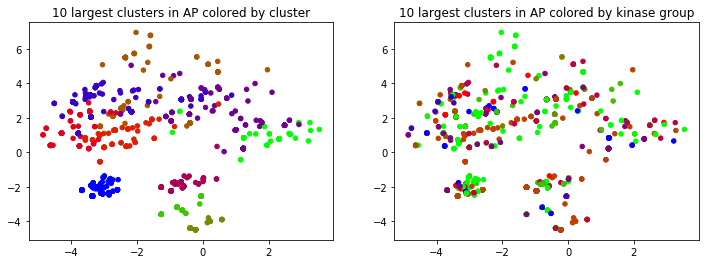

In [43]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_AP, 'AP')

Maximum common substructure per cluster: 


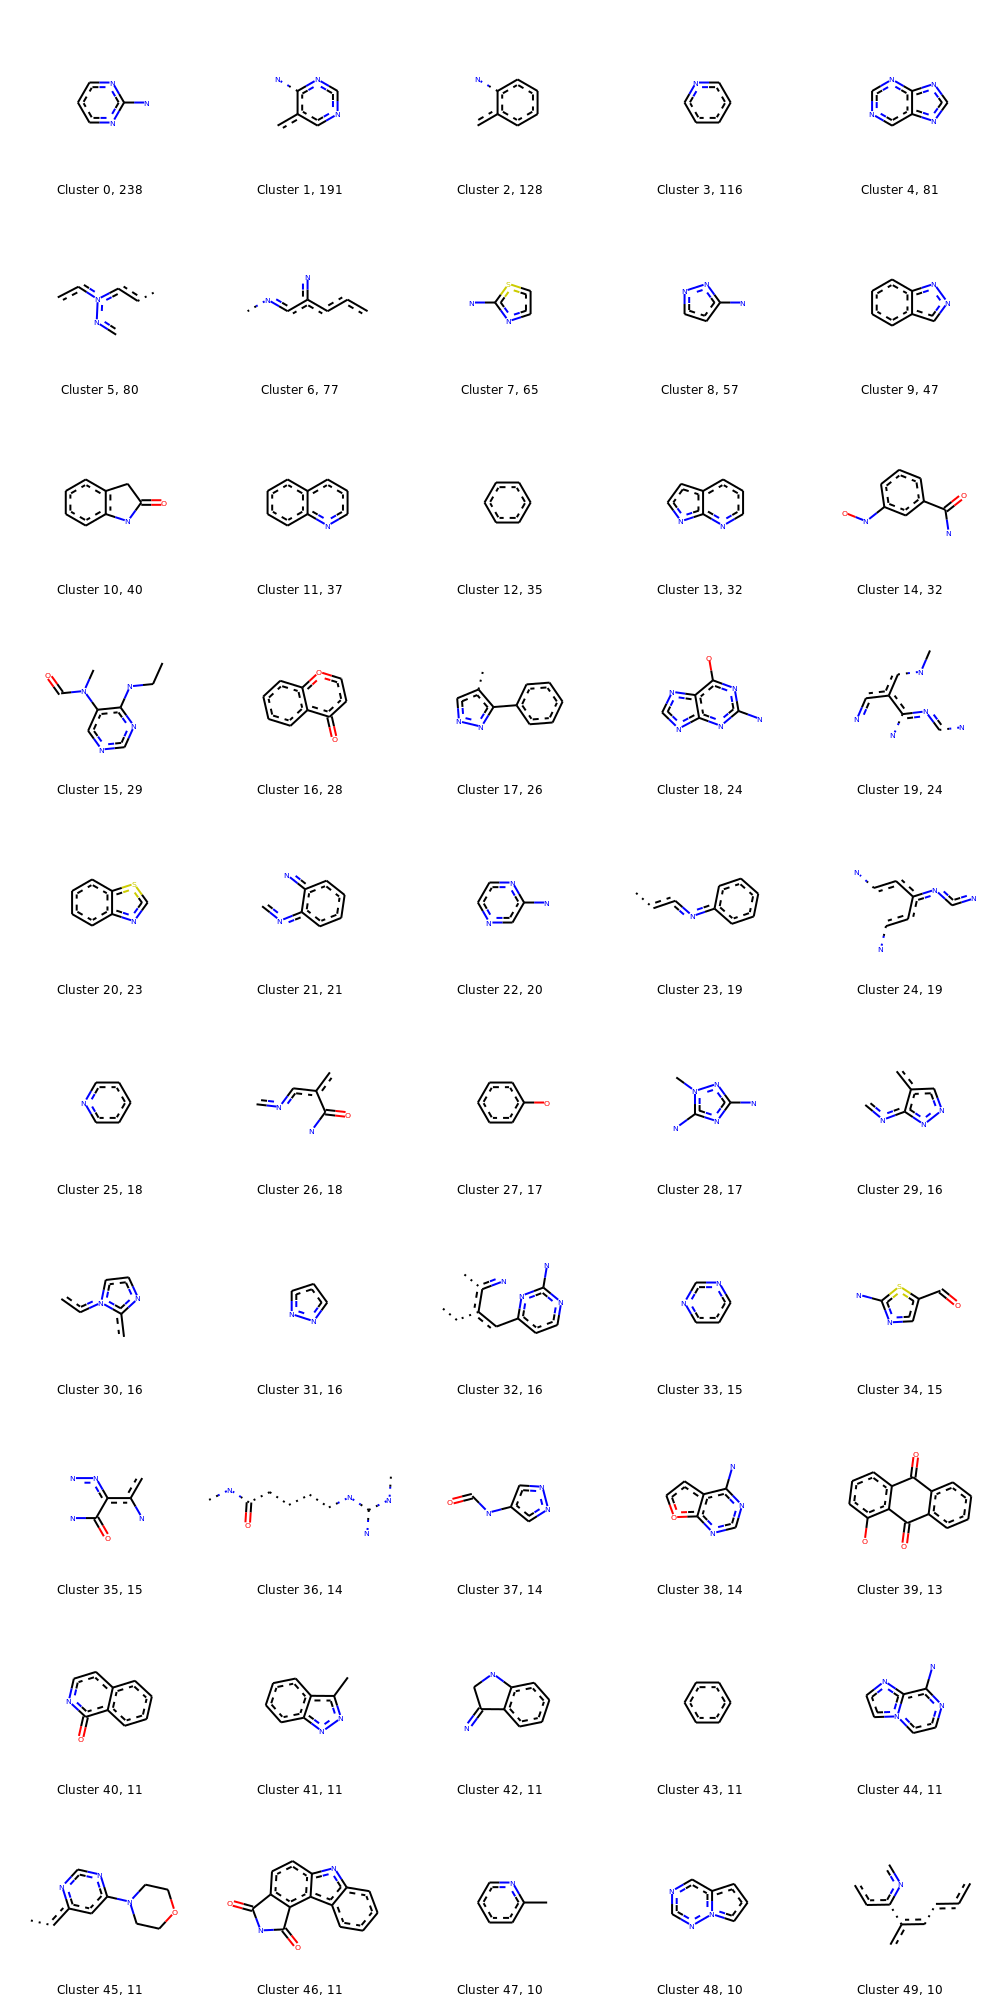

In [44]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:50]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [40]:
# kinases of first clusters for KinMap
kinases = list(df_AP.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/AP_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/AP_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster20_kinases = [kinases[i] for i in clusters[20]]
with open('./KinMap/AP_20.txt', 'w') as f:
    for k in cluster20_kinases:
        f.write(k)
        f.write('\n')
cluster39_kinases = [kinases[i] for i in clusters[39]]
with open('./KinMap/AP_39.txt', 'w') as f:
    for k in cluster39_kinases:
        f.write(k)
        f.write('\n')
cluster46_kinases = [kinases[i] for i in clusters[46]]
with open('./KinMap/AP_46.txt', 'w') as f:
    for k in cluster46_kinases:
        f.write(k)
        f.write('\n')

## FRONT POCKET:

FP
Threshold:  0.5
total # clusters:  305
# clusters with only 1 compound:  136
# clusters with >5 compounds:  62
# clusters with >25 compounds:  13
# clusters with >100 compounds:  2


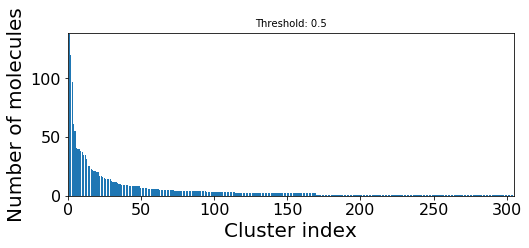

Total number of fragments:  1782


In [45]:
# investigate front pocket
cutoff = 0.5
fps = df_FP.fingerprint
frags = df_FP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'FP', cutoff)

print('Total number of fragments: ', len(frags))

In [46]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

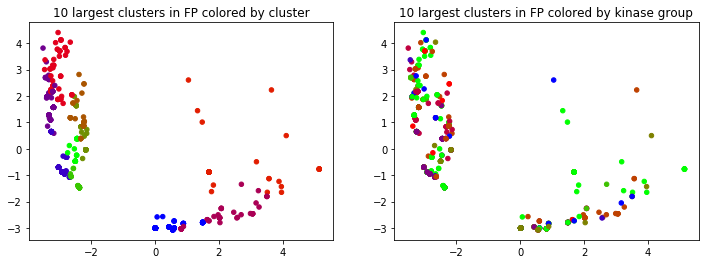

In [47]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_FP, 'FP')

Maximum common substructure per cluster: 


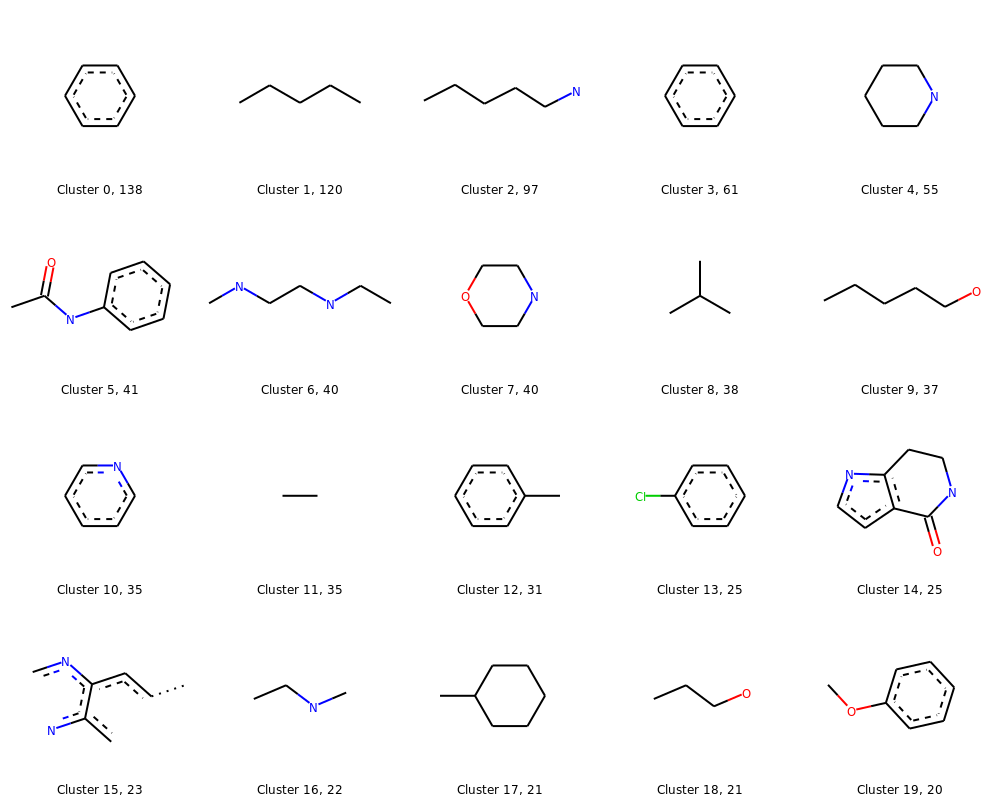

In [48]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [50]:
# kinases of first clusters for KinMap
kinases = list(df_FP.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/FP_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/FP_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster13_kinases = [kinases[i] for i in clusters[13]]
with open('./KinMap/FP_13.txt', 'w') as f:
    for k in cluster13_kinases:
        f.write(k)
        f.write('\n')

## SE POCKET:

SE
Threshold:  0.5
total # clusters:  213
# clusters with only 1 compound:  90
# clusters with >5 compounds:  43
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


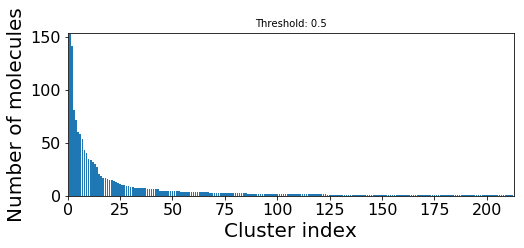

Total number of fragments:  1488


In [51]:
# investigate solvent exposed pocket
cutoff = 0.5
fps = df_SE.fingerprint
frags = df_SE.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'SE', cutoff)

print('Total number of fragments: ', len(frags))

In [52]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

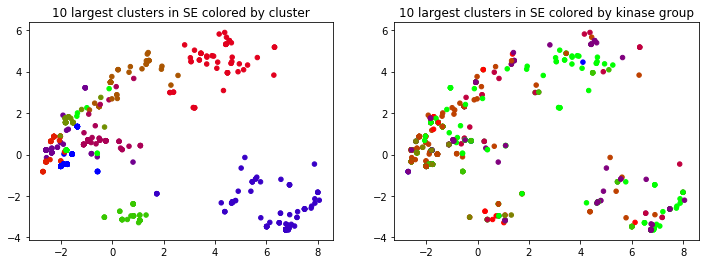

In [53]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_SE, 'SE')

Maximum common substructure per cluster: 


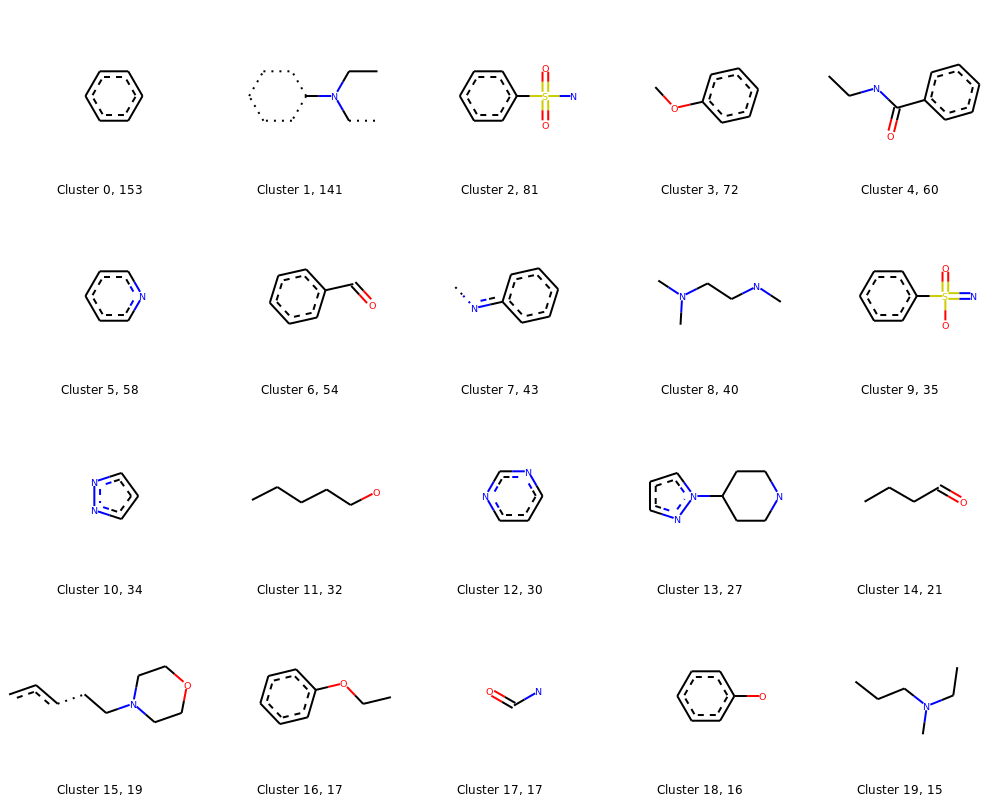

In [54]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## GATE AREA:

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  85
# clusters with >5 compounds:  36
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


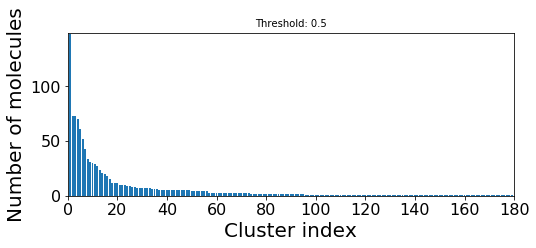

Total number of fragments:  1202


In [55]:
# investigate gate area
cutoff = 0.5
fps = df_GA.fingerprint
frags = df_GA.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'GA', cutoff)
print('Total number of fragments: ', len(frags))

In [56]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

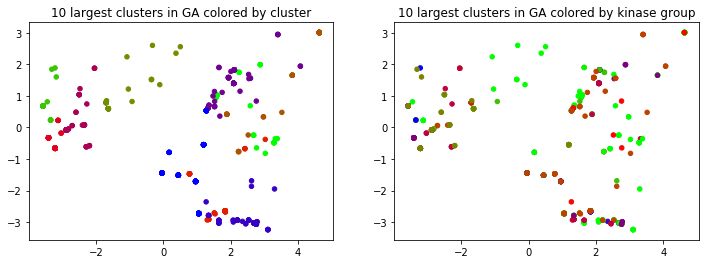

In [57]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_GA, 'GA')

Maximum common substructure per cluster: 


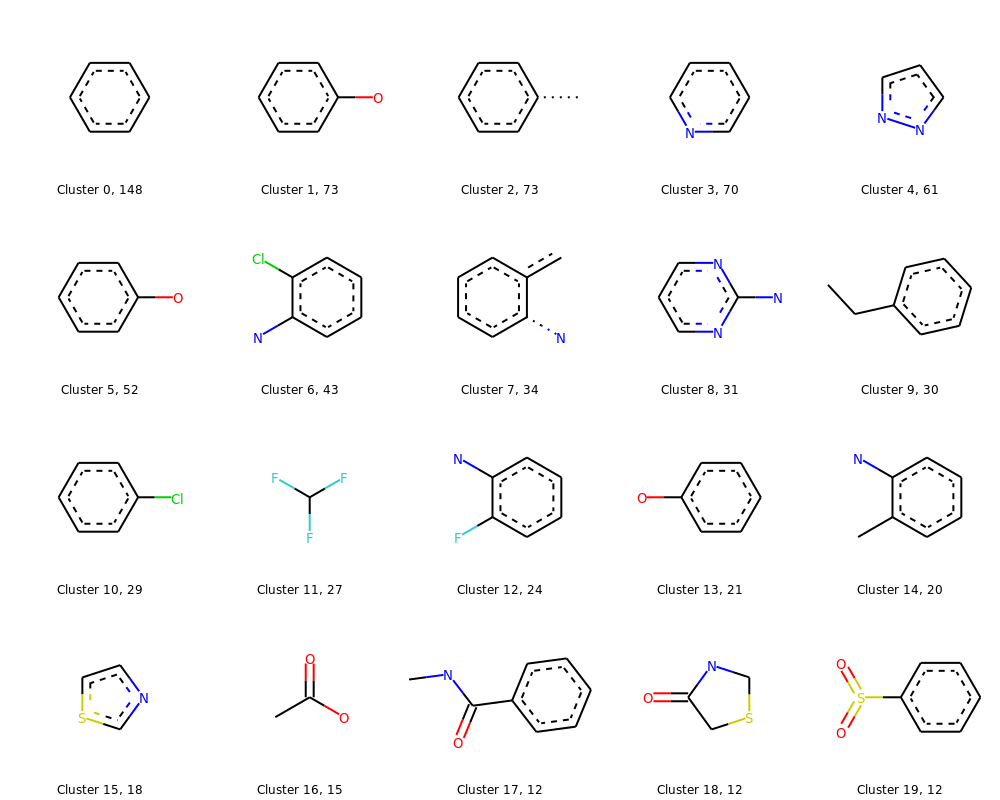

In [59]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [61]:
# kinases of first clusters for KinMap
kinases = list(df_GA.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/GA_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/GA_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster6_kinases = [kinases[i] for i in clusters[6]]
with open('./KinMap/GA_6.txt', 'w') as f:
    for k in cluster6_kinases:
        f.write(k)
        f.write('\n')
cluster11_kinases = [kinases[i] for i in clusters[11]]
with open('./KinMap/GA_11.txt', 'w') as f:
    for k in cluster11_kinases:
        f.write(k)
        f.write('\n')
cluster19_kinases = [kinases[i] for i in clusters[19]]
with open('./KinMap/GA_19.txt', 'w') as f:
    for k in cluster19_kinases:
        f.write(k)
        f.write('\n')

## BACK POCKET I

B1
Threshold:  0.5
total # clusters:  33
# clusters with only 1 compound:  17
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


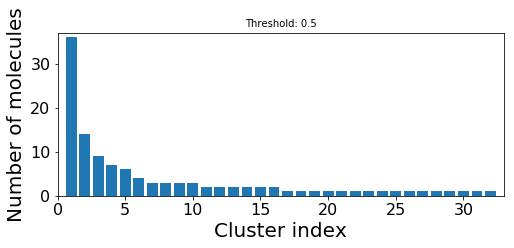

Total number of fragments:  246


In [62]:
# investigate back pocket I
cutoff = 0.5
fps = df_B1.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B1', cutoff)
print('Total number of fragments: ', len(frags))

In [63]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

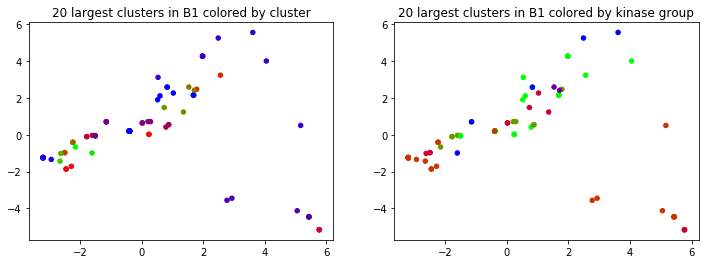

In [64]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B1, 'B1')

Maximum common substructure per cluster: 


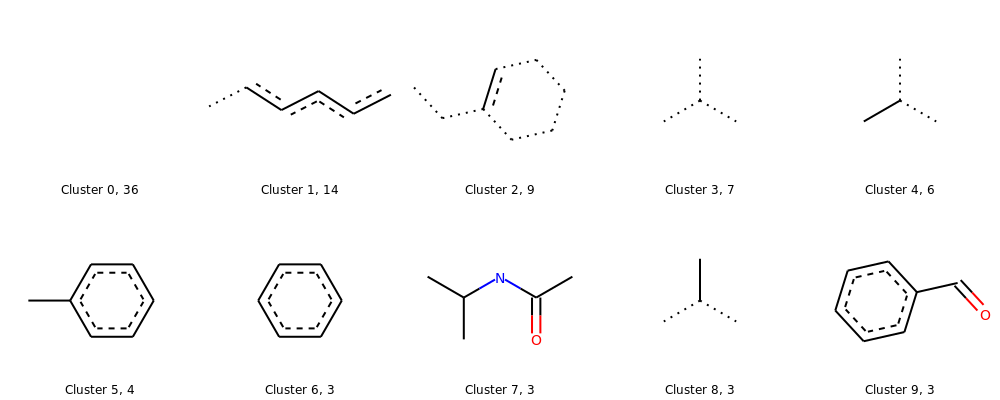

In [66]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags, threshold=0.7) # different threshold than usual in order to see sth!
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## BACK POCKET II

B2
Threshold:  0.5
total # clusters:  72
# clusters with only 1 compound:  30
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


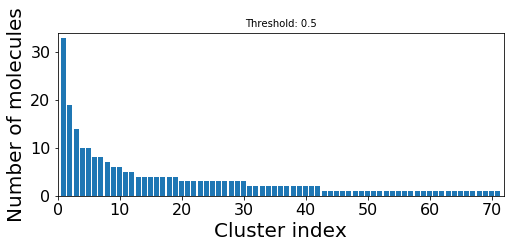

Total number of fragments:  246


In [67]:
# investigate back pocket II
cutoff = 0.5
fps = df_B2.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B2', cutoff)
print('Total number of fragments: ', len(frags))

In [68]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

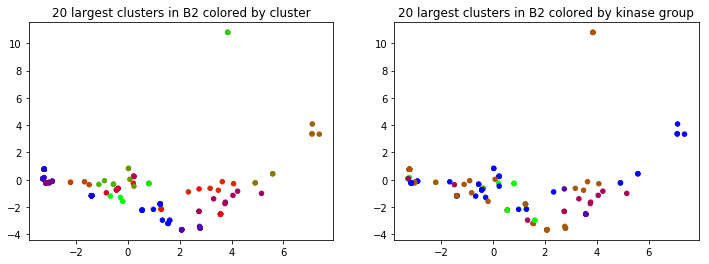

In [69]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B2, 'B2')

Maximum common substructure per cluster: 


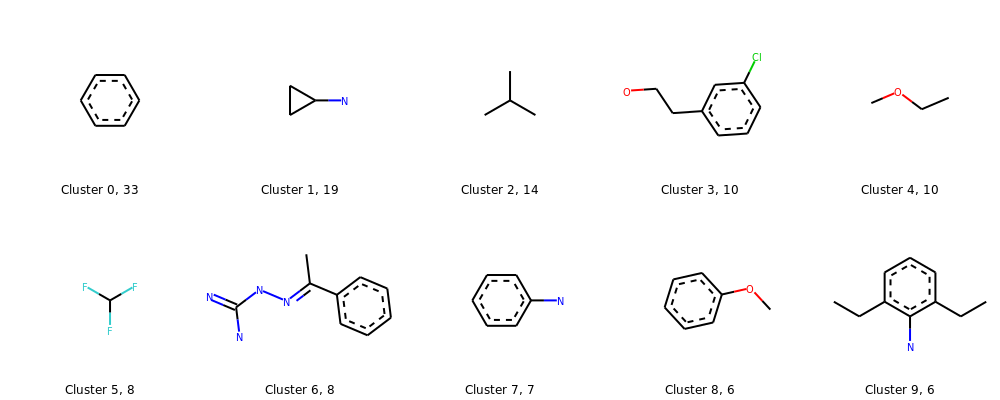

In [71]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [72]:
# kinases of first clusters for KinMap
kinases = list(df_B2.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/B2_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/B2_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster3_kinases = [kinases[i] for i in clusters[3]]
with open('./KinMap/B2_3.txt', 'w') as f:
    for k in cluster3_kinases:
        f.write(k)
        f.write('\n')